# Universidad Ricardo Palma 
## Unidad de Postgrado 
### Maestría en Ciencia de los datos 

**Tarea: -**

* Código: 202020627
* Alumno: Manosalva López Anthony

## Importación de librería Sympy

In [1]:
import sympy as sym
sym.init_printing(use_latex=True)

## Definición de variables

In [2]:
x = sym.Symbol('x')

In [3]:
eq1_str = '2*x**2 + 4*x + 2'
eq2_str = 'cos(x)'
eq3_str = 'log(x)'
eq4_str = 'exp(x)'
eq_str = eq1_str

### Función para Parseo de la ecuación

In [4]:
def parseo_funcion(eq_str):
    try:
        x = sym.Symbol('x')
        eq = sym.parse_expr(eq_str)
        print("Parseo de función realizada con éxito. La función ingresada es la siguiente:")
        display(eq)        
    except Exception as e:
        print("{}: Error en la estructura de la ecuación.".format(e))    
        eq = None
    finally:
        return eq

In [5]:
eq = parseo_funcion(eq1_str)

Parseo de función realizada con éxito. La función ingresada es la siguiente:


### Función para la Evaluación de la función en un punto

In [6]:
def evaluar_funcion(eq, valor):
    print("\nEvaluando el valor {} en la ecuación. Resultado: ".format(valor))
    resultado = eq.subs(x, valor).evalf()
    display(resultado)
    return resultado

In [7]:
evaluar_funcion(eq, 4)


Evaluando el valor 4 en la ecuación. Resultado: 


### Función para Operaciones algebraicas: Factorizar, expandir, derivar

In [8]:
def operaciones_algebraicas(eq, option):
    """
    Parámetros:
    - eq: Ecuación en formato sympy
    - option: Operación a realizar. 
            * option = 'factor': Factorizar
            * option = 'expand': Expandir
            * option = 'diff': Derivar    
    """
    
    if option == 'factor':
        # Factorizar
        print("\nFactorizando la ecuación: ")
        eq_fact = sym.factor(eq) 
        display(eq_fact)    
        eq_final = eq_fact
    
    elif option == 'expand': 
        # Expandir
        print("\nExpandiendo la ecuación: ")
        eq_expa = sym.expand(eq)
        display(eq_expa)
        eq_final = eq_expa

    elif option == 'diff':
        # Derivada
        print("\nDerivando la ecuación: ")
        eq_deri = sym.diff(eq)
        display(eq_deri)
        eq_final = eq_deri
        
    else: 
        print("\nOpción inválida. No se aplicará alguna operación a la función")
        eq_final = eq
    
    return eq_final

In [9]:
eq_fact = operaciones_algebraicas(eq, 'factor')
eq_expa = operaciones_algebraicas(eq, 'expand')
eq_diff = operaciones_algebraicas(eq, 'diff')


Factorizando la ecuación: 



Expandiendo la ecuación: 



Derivando la ecuación: 


### Graficar funciones

Graficar funciones (Facilidad de manejar el dominio de la función (x que vaya de -5 a 5 o el y)

In [10]:
plot = sym.plotting.plot

In [32]:
def plot_function(eq, values_x=None, x_lim=None, y_lim=None):
    """
    Parámetros:
    - eq: Ecuación en formato sympy
    - values_x: Tupla con el intervalo de valores de x
    - x_lim: Tupla con los límites de los ejes x
    - y_lim: Tupla con los límites de los ejes y
    """
    
    if not(values_x):
        values_x = (-5, 5)
    
    if not(x_lim):
        x_lim = values_x
    
    if not(y_lim):
        y_lim = (-10, 10)    
        
    print("\nEcuación a graficar: ")
    display(eq)
    
    print("\nIntervalo de valores de x: [{},{}]".format(values_x[0], values_x[1]))
    
    print("\nLímites del Eje x: [{},{}]".format(x_lim[0], x_lim[1]))
    print("Límites del Eje y: [{},{}]".format(y_lim[0], y_lim[1]))
    print("\nGraficando:\n")
    
    
    plot(eq, # Ecuación
         (x, values_x[0], values_x[1]),  # Intervalo de valores
         title = "f(x) = {}\n".format(str(eq)), # Título
         xlim = x_lim,
         ylim = y_lim, 
         line_color='#278c27')
    


Ecuación a graficar: 



Intervalo de valores de x: [-5,5]

Límites del Eje x: [-5,5]
Límites del Eje x: [-10,10]

Graficando:



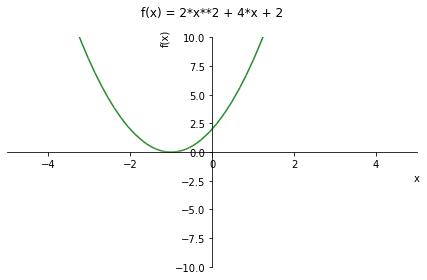

In [12]:
plot_function(eq)


Ecuación a graficar: 



Intervalo de valores de x: [-4,2]

Límites del Eje x: [-4,2]
Límites del Eje x: [0,10]

Graficando:



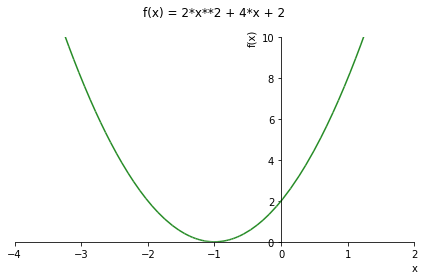

In [14]:
plot_function(eq=eq, values_x=(-4,2), y_lim=(0,10) )

### Encapsulando las funciones anteriores en una general:

In [46]:
def equation_ops(equation, value, plot_props={}):
    """
    Parámetros:
    - equation: Ecuación en formato sympy
    - value: Valor a evaluar en la función
    - plot_props: Diccionario para la configuración de la gráfica en dos dimensiones. El diccionario debe tener como llaves lo siguiente:
        * values_x: Tupla con el intervalo de valores de x
        * x_lim: Tupla con los límites de los ejes x
        * y_lim: Tupla con los límites de los ejes y
    """
    
    eq = parseo_funcion(equation)
    evaluar_funcion(eq, value)

    eq_fact = operaciones_algebraicas(eq, 'factor')
    eq_expa = operaciones_algebraicas(eq, 'expand')
    eq_diff = operaciones_algebraicas(eq, 'diff')
    
    # Propiedades de la gráfica
    values_x = plot_props.get("values_x")
    x_lim = plot_props.get("x_lim")
    y_lim = plot_props.get("y_lim")

    plot_function(eq_fact, values_x, x_lim, y_lim)

Parseo de función realizada con éxito. La función ingresada es la siguiente:



Evaluando el valor 90 en la ecuación. Resultado: 



Factorizando la ecuación: 



Expandiendo la ecuación: 



Derivando la ecuación: 



Ecuación a graficar: 



Intervalo de valores de x: [-10,10]

Límites del Eje x: [-2,2]
Límites del Eje y: [0,10]

Graficando:



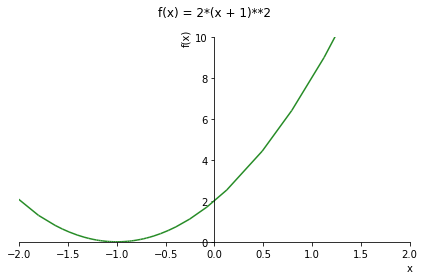

In [47]:
equation = "2*x**2 + 4*x + 2"
value = 90
plot_props =  {
              'values_x': [-10, 10], 
              'x_lim': [-2,2], 
              'y_lim': [0,10]
              }

equation_ops(equation, value, plot_props)

In [ ]:
#!pip install ipywidgets